In [1]:
import torch 
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

path = './emotiv.mat'
data = loadmat(path)['emotiv']
print(data.shape)
print(data[0,:])

(564480, 15)
[4142.05126953 4135.89746094 4162.05126953 4147.69238281 4153.33300781
 4151.79492188 4162.05126953 4169.23046875 4181.02539062 4157.94873047
 4148.71777344 4158.97412109 4154.35888672 4152.30761719    0.        ]


In [3]:
# check 
#print(np.sum(data[:46080, 14]))
print(data[46080, 14])
print(data[46080 + 128 * 48, 14])
print(data[46080 + 128 * 48 * 2, 14])
print(data[46080 + 128 * 48 * 3, 14])
print(data[46080 + 128 * 48 * 4, 14])
print(data[46080 + 128 * 48 * 5, 14])
print(data.shape[0] - (40680 + 128 * 48 * 5 ))


print('128 * 240 == 76800 - 46080 ', 128 * 240 == 76800 - 46080)
print('128 * 30 == 80640 - 76800', 128 * 30 == 80640 - 76800)


1.0
2.0
3.0
4.0
5.0
6.0
493080
128 * 240 == 76800 - 46080  True
128 * 30 == 80640 - 76800 True


In [4]:
# data samples
data_dict = {}
# check data 
classes = ['up', 'down', 'left', 'right', 'middle', 'eye closed']
for i in range(5):
    print('check ', classes[i], np.sum(data[46080 + 128 * 48 * i:46080+128*48 * (i+1), 14]) == 128 * 48 * (i+1))
print('check ', classes[-1], np.sum(data[46080 + 128 * 48 * 5:46080+128*48 * 5 + 128 * 30, 14]) == 128 * 30 * 6)

check  up True
check  down True
check  left True
check  right True
check  middle True
check  eye closed True


In [5]:
data_e = data[46080:80640]
print('data_e shape is ', data_e.shape)

data_e = np.vstack((data_e[:128*48*4, :], data_e[128*48*5:,: ])) 
print('data_e shape ', data_e.shape)
print('check data_e shape ', data_e.shape[0] == 128 * (48 * 4 + 30))

data_e shape is  (34560, 15)
data_e shape  (28416, 15)
check data_e shape  True


In [6]:
# so basically there are 6 classes, which means that the pape

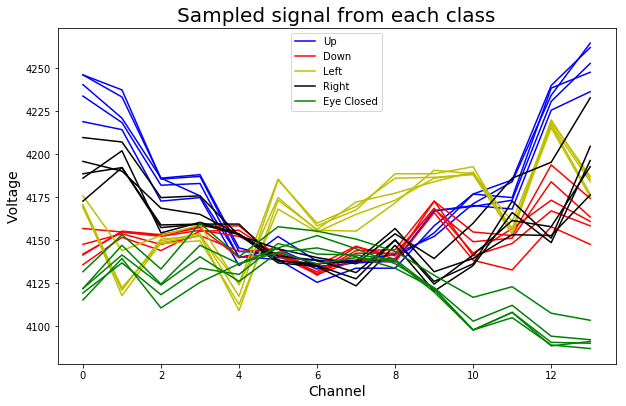

In [37]:
# visualize data in channels

plt.figure(figsize=(10, 6.18))
plt.title('Sampled signal from each class', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
sample = 5
for i in range(sample):
    if i == 0:
        plt.plot(data_e[20 + i,:14], 'b', label='Up')
    else:
        plt.plot(data_e[20 + i,:14], 'b')
    
for i in range(sample):
    if i == 0:
        plt.plot(data_e[128*48 + 20 + i, :14], 'r', label='Down')
    else:
        plt.plot(data_e[128*48 + 20 + i, :14], 'r')
    
for i in range(sample):
    if i == 0:
        plt.plot(data_e[128*48*2 + 20 + i, :14], 'y', label='Left')
    else:
        plt.plot(data_e[128*48*2 + 20 + i, :14], 'y')
    
for i in range(sample):
    if i == 0:
        plt.plot(data_e[128*48*3 + 20 + i, :14], 'k', label='Right')
    else:
        plt.plot(data_e[128*48*3 + 20 + i, :14], 'k')
    
for i in range(sample):
    if i == 0:
        plt.plot(data_e[128*48*4 + 20 + i, :14], 'g', label='Eye Closed')
    else:
        plt.plot(data_e[128*48*4 + 20 + i, :14], 'g')
plt.legend()

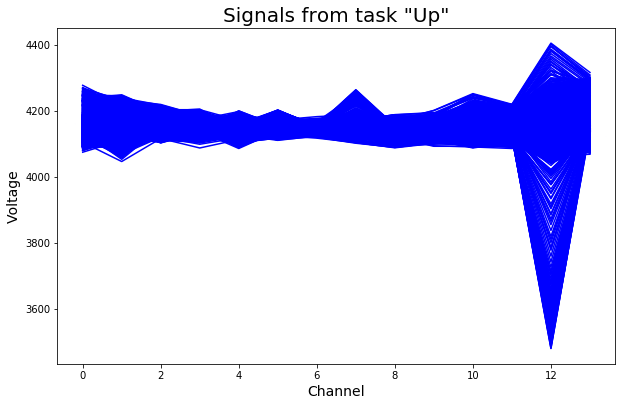

In [40]:
plt.figure(figsize=(10, 6.18))
plt.title('Signals from task "Up"', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
for i in range(128*48):
    if i == 0:
        plt.plot(data_e[i,:14], 'b')
    else:
        plt.plot(data_e[i,:14], 'b')

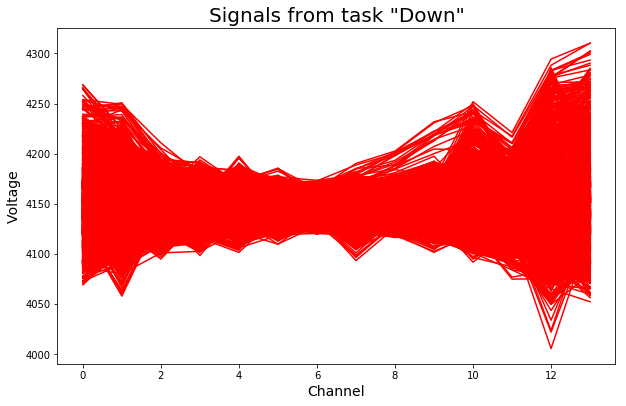

In [45]:
plt.figure(figsize=(10, 6.18))
plt.title('Signals from task "Down"', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
for i in range(128*48):
    plt.plot(data_e[128*48 + i,:14], 'r')

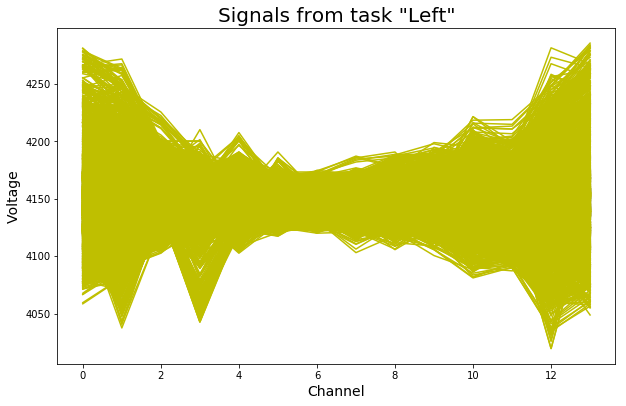

In [42]:
plt.figure(figsize=(10, 6.18))
plt.title('Signals from task "Left"', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
for i in range(128*48):
    plt.plot(data_e[128*48 * 2 + i,:14], 'y')

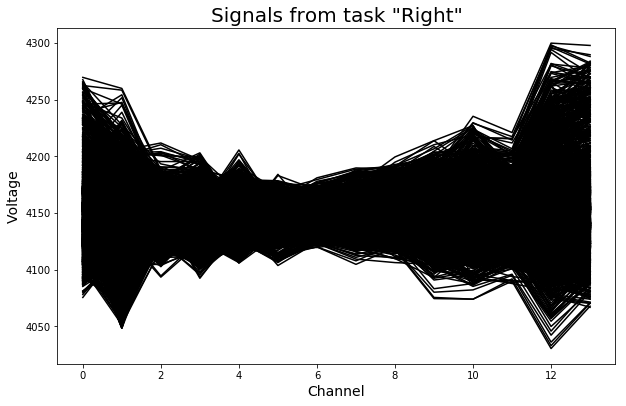

In [43]:
plt.figure(figsize=(10, 6.18))
plt.title('Signals from task "Right"', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
for i in range(128*48):
    plt.plot(data_e[128*48 * 3 + i,:14], 'k')

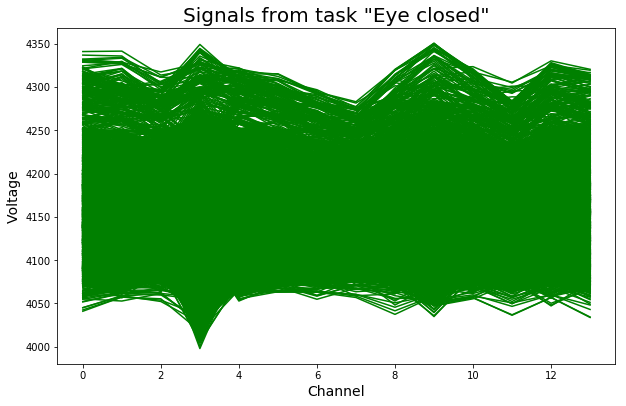

In [44]:
plt.figure(figsize=(10, 6.18))
plt.title('Signals from task "Eye closed"', fontsize=20)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Voltage', fontsize=14)
for i in range(128*30):
    plt.plot(data_e[128*48 * 4 + i,:14], 'g')

Text(0,0.5,'Voltage')

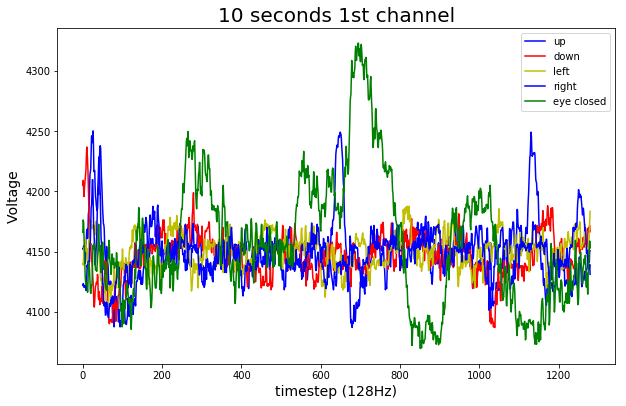

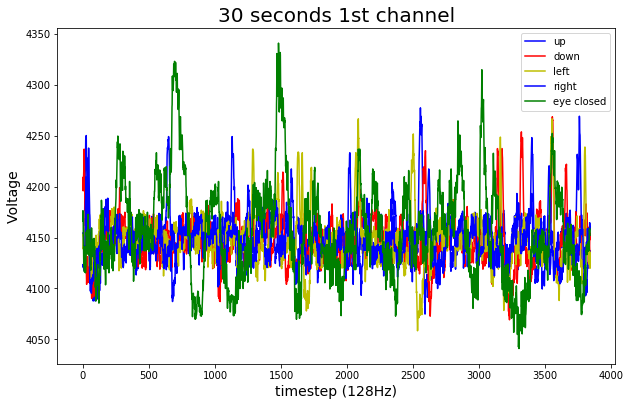

In [53]:
# visualize data in time
plt.figure(figsize=(10, 6.18))
color = ['b', 'r', 'y', 'b', 'g']
for i in range(5):
    plt.plot(data_e[i * 128 * 48 : i * 128 * 48 + 128 * 10, 0], color[i])
plt.legend(['up', 'down', 'left', 'right', 'eye closed'])
plt.title('10 seconds 1st channel', fontsize=20)
plt.xlabel('timestep (128Hz)', fontsize=14)
plt.ylabel('Voltage', fontsize=14)

plt.figure(figsize=(10, 6.18))
color = ['b', 'r', 'y', 'b', 'g']
for i in range(5):
    plt.plot(data_e[i * 128 * 48 : i * 128 * 48 + 128 * 30, 0], color[i])
plt.legend(['up', 'down', 'left', 'right', 'eye closed'])
plt.title('30 seconds 1st channel', fontsize=20)
plt.xlabel('timestep (128Hz)', fontsize=14)
plt.ylabel('Voltage', fontsize=14)

Text(0,0.5,'Voltage')

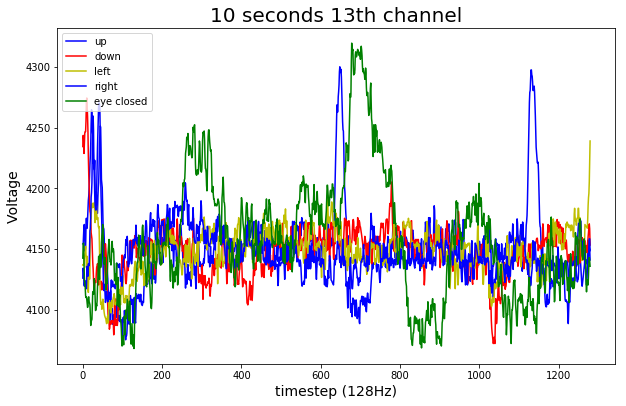

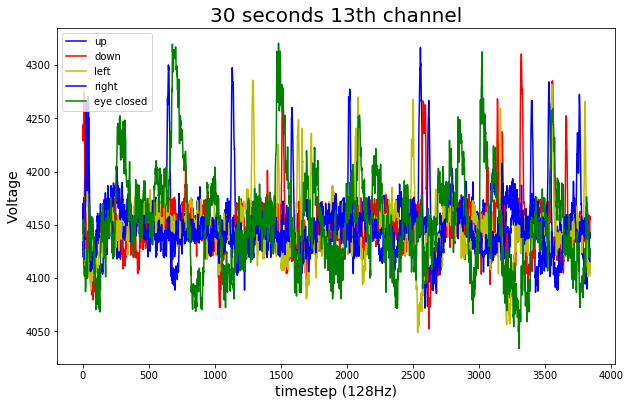

In [54]:
# visualize data in time
plt.figure(figsize=(10, 6.18))
color = ['b', 'r', 'y', 'b', 'g']
for i in range(5):
    plt.plot(data_e[i * 128 * 48 : i * 128 * 48 + 128 * 10, -2], color[i])
plt.legend(['up', 'down', 'left', 'right', 'eye closed'])
plt.title('10 seconds 13th channel', fontsize=20)
plt.xlabel('timestep (128Hz)', fontsize=14)
plt.ylabel('Voltage', fontsize=14)

plt.figure(figsize=(10, 6.18))
color = ['b', 'r', 'y', 'b', 'g']
for i in range(5):
    plt.plot(data_e[i * 128 * 48 : i * 128 * 48 + 128 * 30, -2], color[i])
plt.legend(['up', 'down', 'left', 'right', 'eye closed'])
plt.title('30 seconds 13th channel', fontsize=20)
plt.xlabel('timestep (128Hz)', fontsize=14)
plt.ylabel('Voltage', fontsize=14)

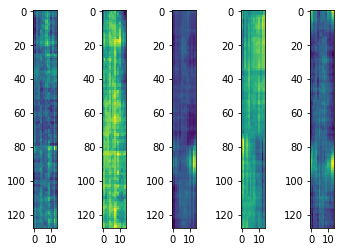

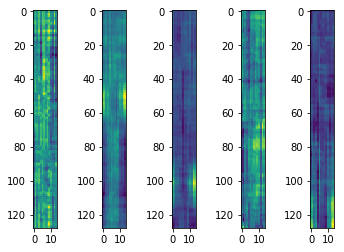

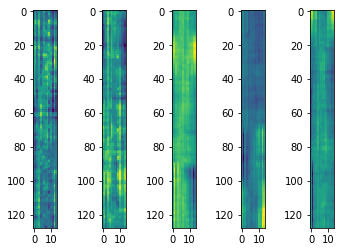

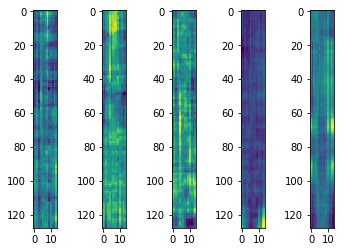

In [82]:
# visualize data in time and channels
fig, axes = plt.subplots(nrows = 1, ncols = 5)
i = 0
for col in axes:
    col.imshow(data[128*48*i: 128*48*i+128, : -1])
    i += 1
    
fig, axes = plt.subplots(nrows = 1, ncols = 5)
i = 0
for col in axes:
    col.imshow(data[128*48*i + 128: 128*48*i+128 * 2, : -1])
    i += 1
    
fig, axes = plt.subplots(nrows = 1, ncols = 5)
i = 0
for col in axes:
    col.imshow(data[128*48*i + 128 * 2: 128*48*i+128 * 3, : -1])
    i += 1
    

fig, axes = plt.subplots(nrows = 1, ncols = 5)
i = 0
for col in axes:
    col.imshow(data[128*48*i + 128 * 10: 128*48*i+128 * 11, : -1])
    i += 1


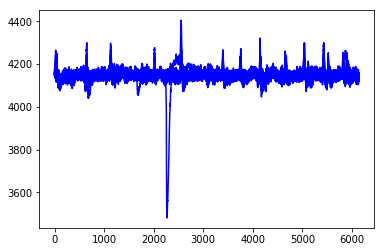

In [97]:
plt.figure()
for i in range(14):
    plt.plot(data_e[:128*48, i], 'b')

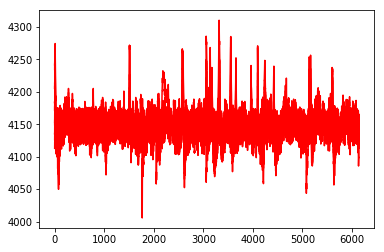

In [99]:
plt.figure()
for i in range(14):
    plt.plot(data_e[128*48:128*48*2, i], 'r')

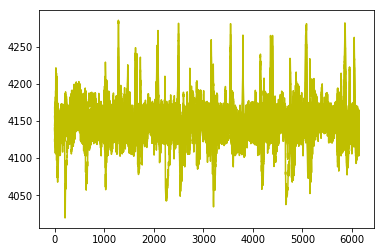

In [100]:
plt.figure()
for i in range(14):
    plt.plot(data_e[128*48*2:128*48*3, i], 'y')

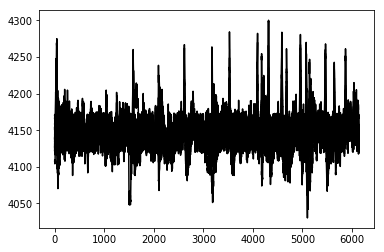

In [101]:
plt.figure()
for i in range(14):
    plt.plot(data_e[128*48*3:128*48*4, i], 'k')

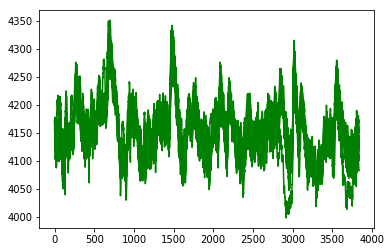

In [103]:
plt.figure()
for i in range(14):
    plt.plot(data_e[128*48*4:128*48*5, i], 'g')

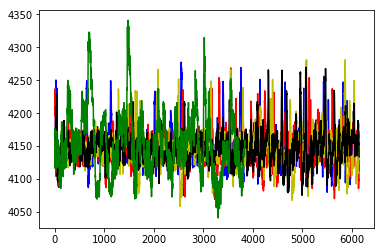

In [105]:

channel = 0
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

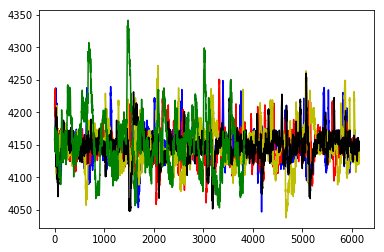

In [106]:

channel = 1
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

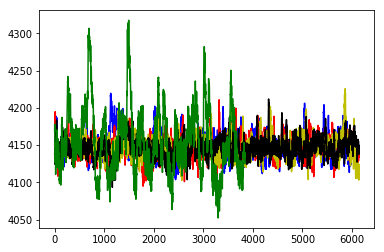

In [107]:

channel = 2
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

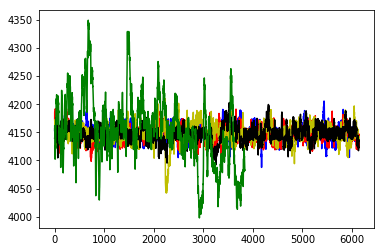

In [108]:

channel = 3
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

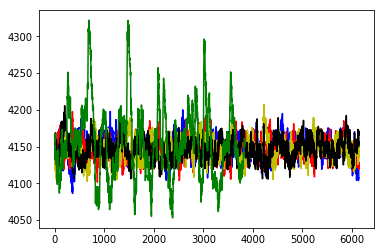

In [109]:

channel = 4
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

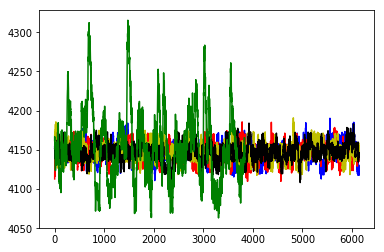

In [110]:

channel = 5
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

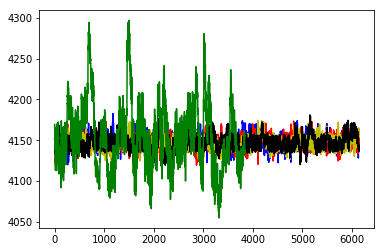

In [111]:

channel = 6
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

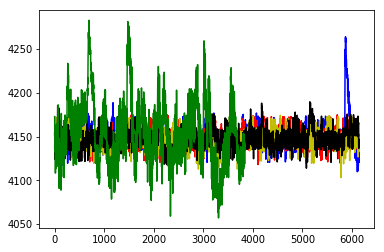

In [112]:

channel = 7
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

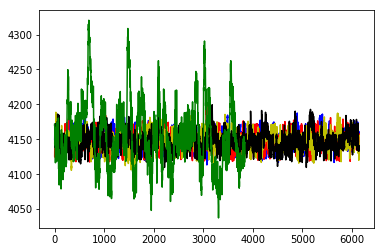

In [113]:

channel = 8
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

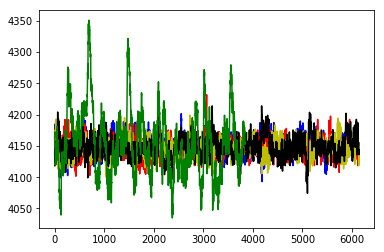

In [114]:

channel = 9
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

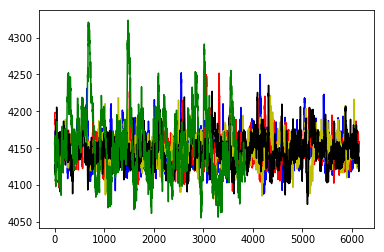

In [115]:

channel = 10
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

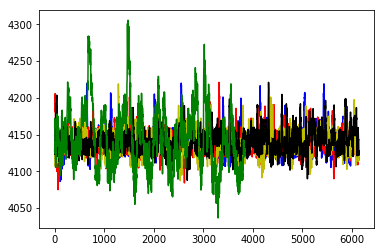

In [116]:

channel = 11
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

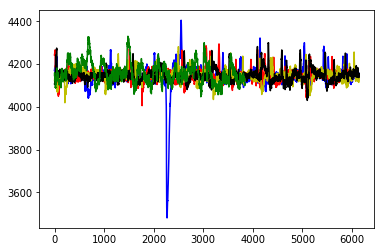

In [117]:

channel = 12
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')

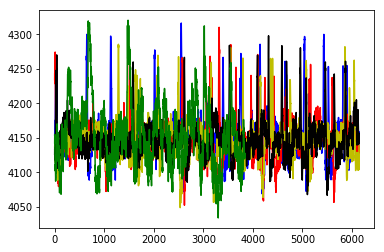

In [118]:

channel = 13
plt.figure()
plt.plot(data_e[0:128*48, channel], 'b')
plt.plot(data_e[128*48:128*48*2, channel], 'r')
plt.plot(data_e[128*48*2:128*48*3, channel], 'y')
plt.plot(data_e[128*48*3:128*48*4, channel], 'k')
plt.plot(data_e[128*48*4:, channel], 'g')